In [1]:
import pandas as pd
from ch2.data import *
from ch2.data.power import *

s = session('-v 0')
stats = activity_statistics(s, LATITUDE, LONGITUDE, SPHERICAL_MERCATOR_X, SPHERICAL_MERCATOR_Y, DISTANCE,
                            ELEVATION, SPEED, CADENCE, HEART_RATE, HEADING, 
                            local_time='2018-03-04 07:16:33', activity_group_name='Bike', with_timespan=True)
stats.describe()

,Timespan ID,Distance,Heart Rate,Longitude,Spherical Mercator Y,Latitude,Heading,Elevation,Spherical Mercator X,Cadence,Speed
count,5109.000000,2933.000000,2933.000000,2885.000000,2.885000e+03,2885.000000,2566.000000,2784.000000,2.885000e+03,2903.000000,2886.000000
mean,19426.072617,52424.331323,114.568360,-70.806271,-3.958354e+06,-33.473723,2.106571,580.671118,-7.882118e+06,61.558043,5.694779
std,28.803271,29499.017849,13.942284,0.108272,4.580758e+03,0.034321,103.322598,149.218650,1.205278e+04,45.063903,2.914509
min,19385.000000,0.000000,65.000000,-70.949936,-3.968472e+06,-33.549516,-179.561162,401.366177,-7.898111e+06,0.000000,0.000000
25%,19400.000000,29534.110000,105.000000,-70.922318,-3.962073e+06,-33.501597,-97.700035,479.115404,-7.895036e+06,0.000000,3.154000
50%,19416.000000,52038.000000,115.000000,-70.826145,-3.956594e+06,-33.460546,-1.443903,518.720135,-7.884330e+06,87.000000,6.196000
75%,19445.000000,79518.980000,125.000000,-70.706109,-3.954961e+06,-33.448303,95.946901,617.829422,-7.870968e+06,100.000000,7.539000
max,19485.000000,102708.060000,161.000000,-70.607797,-3.951217e+06,-33.420239,179.732586,997.497194,-7.860024e+06,159.000000,13.175000


In [2]:
freq, linear = linear_resample(stats)
linear.describe()

,Timespan ID,Distance,Heart Rate,Longitude,Spherical Mercator Y,Latitude,Heading,Elevation,Spherical Mercator X,Cadence,Speed,Delta Time
count,6283.000000,6283.000000,6283.000000,6242.000000,6.242000e+03,6242.000000,6207.000000,6239.000000,6.242000e+03,6270.000000,6242.000000,6282
mean,19425.099475,51751.938859,118.268599,-70.819444,-3.958277e+06,-33.473148,2.717119,597.748738,-7.883584e+06,71.276289,5.409185,0 days 00:00:03
std,28.319584,27682.424362,13.420197,0.107032,4.447469e+03,0.033322,100.879270,164.376215,1.191479e+04,39.397588,2.694268,0 days 00:00:00
min,19385.000000,0.000000,65.166667,-70.949932,-3.968472e+06,-33.549516,-179.561162,401.369083,-7.898110e+06,0.000000,0.000000,0 days 00:00:03
25%,19401.000000,32839.966875,109.250000,-70.924607,-3.962010e+06,-33.501121,-95.222100,478.165946,-7.895291e+06,44.361111,2.804165,0 days 00:00:03
50%,19413.000000,48875.820000,118.875000,-70.840766,-3.956572e+06,-33.460374,-0.202490,525.487573,-7.885958e+06,90.788889,6.092950,0 days 00:00:03
75%,19443.000000,75163.750000,127.555556,-70.735111,-3.955183e+06,-33.449971,95.066959,695.900710,-7.874197e+06,100.777778,7.327333,0 days 00:00:03
max,19485.000000,102708.060000,161.000000,-70.607797,-3.951217e+06,-33.420239,179.545966,997.497194,-7.860024e+06,151.000000,13.175000,0 days 00:00:03


In [3]:
correln = [linear[HEART_RATE].corr(linear[HEART_RATE].shift(freq=n * freq)) for n in range(100)]
print(correln)

[1.0, 0.9974155030611532, 0.9909369846640893, 0.9817588481392304, 0.9705521977762402, 0.9578064712886789, 0.9438467337006592, 0.9291684167732204, 0.9140047223130797, 0.8987648492070874, 0.8836168762820111, 0.8684390865839396, 0.8540299600328917, 0.8402495462105826, 0.8272682877327713, 0.8145632295429415, 0.8025338375248882, 0.7907909148184267, 0.7794228176925659, 0.7687243895768805, 0.7578197642205127, 0.7483025529763379, 0.7392913751987839, 0.7307908321348071, 0.7225005538528775, 0.714226485941, 0.7065309397582632, 0.6996611271499525, 0.6933385557196383, 0.6869293513325918, 0.6806470213351946, 0.6749439778119544, 0.6693445148587618, 0.6643815535470501, 0.6595430361681581, 0.6547977672038556, 0.6491564067048053, 0.6439368412085763, 0.6391547153403195, 0.6338339865120571, 0.6287166299626328, 0.6229209011680575, 0.6168860843634758, 0.610384934370202, 0.6049396487969069, 0.6000489723305724, 0.5950015884890102, 0.5906250216624686, 0.5844823317320027, 0.5782137207892579, 0.5734470266452193,

In [4]:
linear = add_differentials(linear)
print(linear[DELTA_TIME].describe())
linear = add_energy_budget(linear, 64+12)
linear = add_loss_estimate(linear)
linear = add_power_estimate(linear)
print(linear.describe())
df = linear

count               6210
mean     0 days 00:00:03
std      0 days 00:00:00
min      0 days 00:00:03
25%      0 days 00:00:03
50%      0 days 00:00:03
75%      0 days 00:00:03
max      0 days 00:00:03
Name: Delta Time, dtype: object
        Timespan ID       Distance   Heart Rate    Longitude  \
count   6210.000000    6210.000000  6210.000000  6210.000000   
mean   19425.087762   51865.430096   118.472084   -70.820530   
std       27.981343   27282.834385    13.192472     0.106230   
min    19386.000000      15.450000    68.000000   -70.949932   
25%    19401.000000   33446.058750   109.513889   -70.924670   
50%    19413.000000   49034.045714   119.000000   -70.842592   
75%    19443.000000   74906.799688   127.611538   -70.736985   
max    19484.000000  102140.760000   161.000000   -70.609495   

       Spherical Mercator Y     Latitude      Heading    Elevation  \
count          6.210000e+03  6210.000000  6207.000000  6210.000000   
mean          -3.958310e+06   -33.473396     2.7171

In [5]:
import scipy as sp
# freq, shift = measure_initial_shift(df)
# xy = df[HEART_RATE].to_frame().join(df[POWER].shift(freq=shift*freq).to_frame(), how='inner')
# xy.describe()
# fit = sp.stats.linregress(x=df[POWER], y=df[HEART_RATE])
# print(fit)

freq, shift = measure_initial_delay(df)
hr_smoothed = df[HEART_RATE].rolling(10, center=True).median().dropna()
h0, h1 = hr_smoothed.iloc[0], hr_smoothed.iloc[-1]
e0, e1 = df[ENERGY].iloc[0], df[ENERGY].iloc[-1]
adaption = (h1 - h0) / (e1 - e0)
xy = (df[HEART_RATE] - adaption * df[ENERGY]).rename(COR_HEART_RATE).to_frame().join(
    df[POWER].shift(freq=shift*freq).to_frame(),
    how='inner')
fit = sp.stats.linregress(x=xy[POWER], y=xy[COR_HEART_RATE])
print(fit)

LinregressResult(slope=0.08374598947512743, intercept=92.19534654578091, rvalue=0.5165745315287497, pvalue=0.0, stderr=0.0018418467938404585)


In [6]:
slope, intercept, adaption, shift = measure_initial_scaling(df)
print(slope, intercept, adaption, shift)

0.08374598947512743 92.19534654578091 1.9905562267252072e-14 10


In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(df[POWER], df[HEART_RATE] - adaption*df[ENERGY], '.')
xx = np.linspace(start=df[POWER].min(), stop=df[POWER].max(), num=10)
plt.plot(xx, xx * slope + fit.intercept, '-')

<IPython.core.display.Javascript object>

In [8]:
def fix(t):
    return pd.to_datetime(t.astype(str))
y = df[POWER] * fit.slope + fit.intercept
plt.figure()
plt.plot(fix(df.index), df[HEART_RATE] - adaption * df[ENERGY], '-')
plt.plot(fix(df.index), y, '-')
plt.plot(fix(df.index), y.ewm(halflife=2).mean())
plt.show()

<IPython.core.display.Javascript object>

/home/andrew/project/ch2/choochoo/env/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


In [9]:
x = np.linspace(0, 100, num=100)
y = pd.Series([0 if xx < 50 else 1 for xx in x])
plt.figure()
plt.plot(x, y, '-')
plt.plot(x, y.ewm(halflife=10).mean())
y.iloc[:] = 1
plt.plot(x, y.ewm(halflife=10).mean())
plt.show()

<IPython.core.display.Javascript object>

In [10]:
def chisq(x, data=df):
    slope, intercept, adaption, shift= x
    pred = (df[POWER] * slope + intercept).ewm(halflife=shift).mean()
    obs = df[HEART_RATE] - adaption * df[ENERGY]
    return sp.stats.chisquare(pred, obs).statistic
print(chisq([0.0928105839805159, 85.83448837419229, 2.6577688633994577e-14, 4], df))

10786.002438126063


In [11]:
result = sp.optimize.minimize(chisq, [0.0928105839805159, 85.83448837419229, 2.6577688633994577e-14, 4], 
                              df, method='Nelder-Mead', options={'disp': True})
print(result)

Optimization terminated successfully.
         Current function value: 3950.498953
         Iterations: 185
         Function evaluations: 307
 final_simplex: (array([[1.72085191e-01, 9.03653541e+01, 1.11225041e-14, 1.55745111e+01],
       [1.72085588e-01, 9.03653002e+01, 1.11225125e-14, 1.55745440e+01],
       [1.72085400e-01, 9.03653384e+01, 1.11224906e-14, 1.55745844e+01],
       [1.72085047e-01, 9.03653455e+01, 1.11225174e-14, 1.55744329e+01],
       [1.72085370e-01, 9.03653602e+01, 1.11224868e-14, 1.55744523e+01]]), array([3950.49895329, 3950.49895329, 3950.4989533 , 3950.4989533 ,
       3950.4989533 ]))
           fun: 3950.49895328595
       message: 'Optimization terminated successfully.'
          nfev: 307
           nit: 185
        status: 0
       success: True
             x: array([1.72085191e-01, 9.03653541e+01, 1.11225041e-14, 1.55745111e+01])


In [12]:
slope, intercept, adaption, shift = result.x
y = df[POWER] * slope + intercept
plt.figure()
plt.plot(fix(df.index), df[HEART_RATE] - adaption * df[ENERGY], '-')
#plt.plot(fix(df.index), y, '-')
plt.plot(fix(df.index), y.ewm(halflife=2).mean())
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


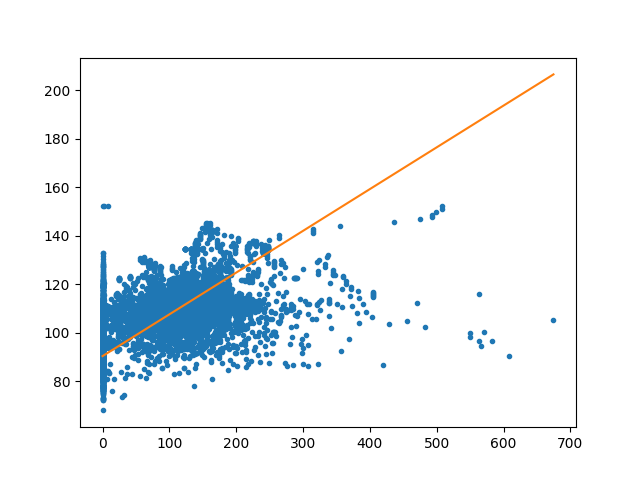

In [13]:
plt.figure()
plt.plot(df[POWER], df[HEART_RATE] - adaption*df[ENERGY], '.')
xx = np.linspace(start=df[POWER].min(), stop=df[POWER].max(), num=10)
plt.plot(xx, xx * slope + intercept, '-')

In [14]:
model = fit_power(df, 'slope', 'intercept', 'adaption', 'delay', 'speed', 'heading', cda=0.44, m=76)
print(model)

NameError: name 'fit_power' is not defined

In [ ]:
from bokeh.plotting import figure, output_notebook, show
output_notebook()

In [ ]:
predicted = df.copy()
predicted[HEART_RATE] = (df[POWER] * model.slope + model.intercept + model.adaption * df[ENERGY]).ewm(halflife=model.delay).mean()
pl = comparison_line_plot(800, 300, DISTANCE, HEART_RATE, source=df, other=predicted)
show(pl)

In [ ]:
CORRECTED_HR = 'Corrected Heart Rate'
PREDICTED_HR = 'Predicted Heart Rate'
DELAYED_PWR = 'Delayed Power'
df[DELAYED_PWR] = df[POWER].ewm(halflife=model.delay).mean()
df[CORRECTED_HR] = df[HEART_RATE] - adaption * df[ENERGY]
df[PREDICTED_HR] = (df[POWER] * model.slope + model.intercept).ewm(halflife=model.delay).mean()
# pl = multi_plot(800, 300, POWER, [CORRECTED_HR, PREDICTED_HR], df, ['black', 'grey'], 
#                plotters=[dot_plotter(), dot_plotter()])
pl = multi_dot_plot(800, 300, CORRECTED_HR, [PREDICTED_HR], df, ['black'])
show(pl)